In [9]:
from pdb import set_trace
from typing import (
    List,
    Dict
)
from itertools import product
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.metrics.pairwise import pairwise_kernels

import gc4eptn
from gc4eptn import dataloaders
from gc4eptn.utils import norms
from gc4eptn.pngs import run_pngs
from gc4eptn.utils import utils 

np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def build_pngs_data(load, topology, drop_parallel_currents):
    flow_pmuds = pmu_class(
        load=load,
        topology=topology,
        drop_current=False,
        drop_parallel_currents=drop_parallel_currents,
    )
    flow_pmuds.file_name = 'Data_pu_Complete.csv'
    flow_pmuds.load_data()
    return flow_pmuds

In [6]:
dataset_type = 'rtds'
dataset_version = 'v5'
difficulty = 'novice'
pmu_class = utils.get_dataloader(dataset_type, dataset_version, difficulty)

loads = [['high', 'medium', 'low']]
topologies =  ['complete', 'partial-left', 'partial-right']
drop_parallel_currents = [False]


data_type_path = utils.build_experiment_path(
    subdirs=[
        dataset_type,
        dataset_version,
        'pngs-flow-test',
        difficulty,
    ]
) 

  0%|          | 0/3 [00:00<?, ?it/s]

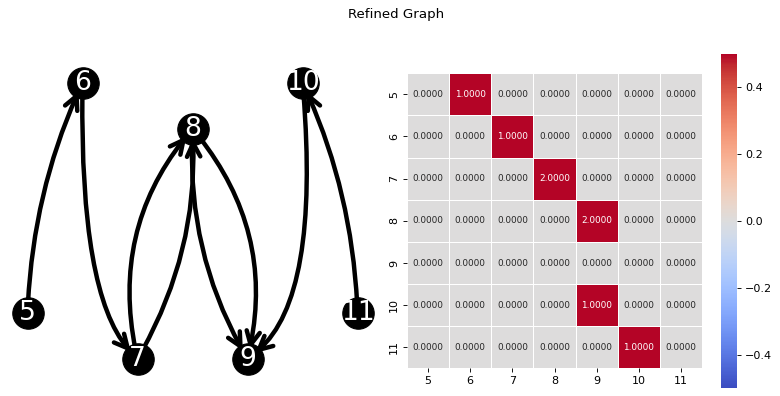

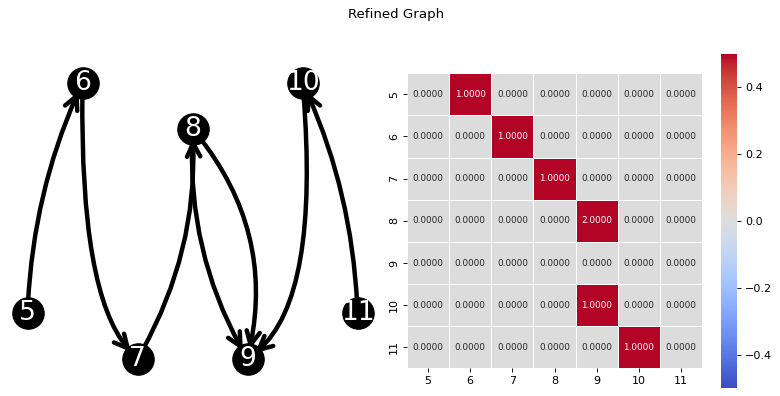

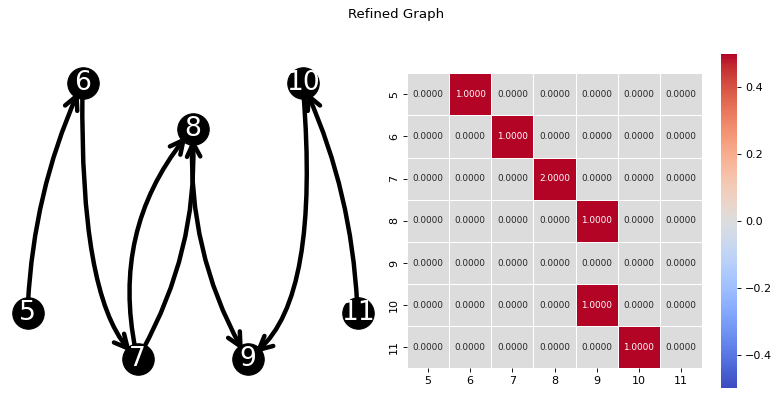

In [10]:
exps = list(product(loads, topologies, drop_parallel_currents))

for load, topology, drop_pc in tqdm(exps):
    save_dir_path = utils.build_experiment_path(
        subdirs=[
            topology,
            load,
            'simple' if drop_pc else 'multi-edge',
        ]
    ) 
    save_dir_path.mkdir(parents=True, exist_ok=True)

    flow_pmuds = build_pngs_data(load, topology, drop_pc)

    # Assume fully connected graph for network graph estimation (worst case)
    A_hat = np.ones(flow_pmuds.true_network_graph.shape)
    np.fill_diagonal(A_hat, 0)
    
    run_pngs(
        flow_pmuds=flow_pmuds,
        A_hat=A_hat,
        min_threshold=0.2,
        axis=1,
        save_path=save_dir_path,
    )
    plt.show()
    plt.clf()
    plt.close('all')